In [11]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml("mnist_784") 
import os

In [12]:
X, y = dataset["data"], dataset["target"] 

In [13]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [14]:
m = 60000  
m_test = X.shape[0] - m
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

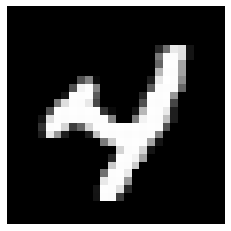

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [15]:
i = 444
plt.imshow(X_train[:,i].reshape(28,28), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [16]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [17]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [18]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [19]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

<ipython-input-17-b3dbf6f23306>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))


Epoch 0 cost:  9.51789103197526
Epoch 100 cost:  0.8838963843791534
Epoch 200 cost:  0.6778689664143334
Epoch 300 cost:  0.5957352272427832
Epoch 400 cost:  0.548040415462551
Epoch 500 cost:  0.517990060196746
Epoch 600 cost:  0.494079737350034
Epoch 700 cost:  0.47634552053936907


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 889    0   23   11    5   23   23    3   14   12]
 [   0 1087   14    3    5    6    1   12   15    3]
 [  12    7  841   34   14   14   31   27   34    8]
 [   8    5   39  816    1   69    3   12   51   18]
 [   0    0   17    0  823   18   17   10   11   83]
 [  36    3    5   56    9  670   22    6   43   19]
 [  20    7   34    7   26   22  853    3   21    3]
 [   1    6   14   15    8   17    1  875   13   57]
 [   9   20   39   51   12   46    5   17  740   16]
 [   5    0    6   17   79    7    2   63   32  790]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1003
           1       0.96      0.95      0.95      1146
           2       0.81      0.82      0.82      1022
           3       0.81      0.80      0.80      1022
           4       0.84      0.84      0.84       979
           5       0.75      0.77      0.76       869
           6       0.89      0.86      0.87       996
           7       0.85      0.87   

<ipython-input-17-b3dbf6f23306>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))
